In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress warnings to keep output clean 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install -U scikit-learn

In [3]:
df = pd.read_csv('D:\Jupyter\heart_disease_dataset.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [4]:
# Display first 5 rows
print("First 5 rows:")
display(df.head())

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Check data types and non-null counts
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Statistical Summary of the dataset
print("Data Statistical Summary:")
display(df.describe())

Data Statistical Summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Check for null values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# Check for and drop duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Dropping {duplicates} duplicate rows...")
    df.drop_duplicates(inplace=True)
    print(f"New Shape: {df.shape}")
else:
    print("No duplicates found.")

Dropping 723 duplicate rows...
New Shape: (302, 14)


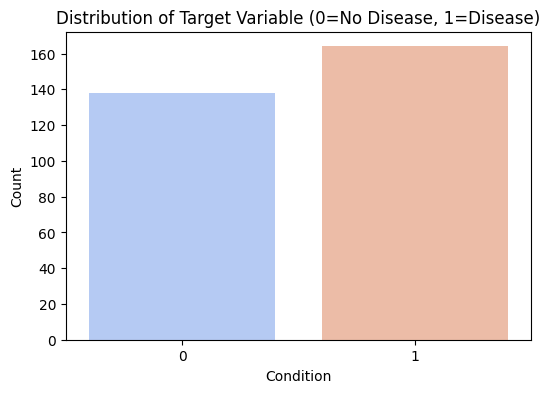

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable (0=No Disease, 1=Disease)')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

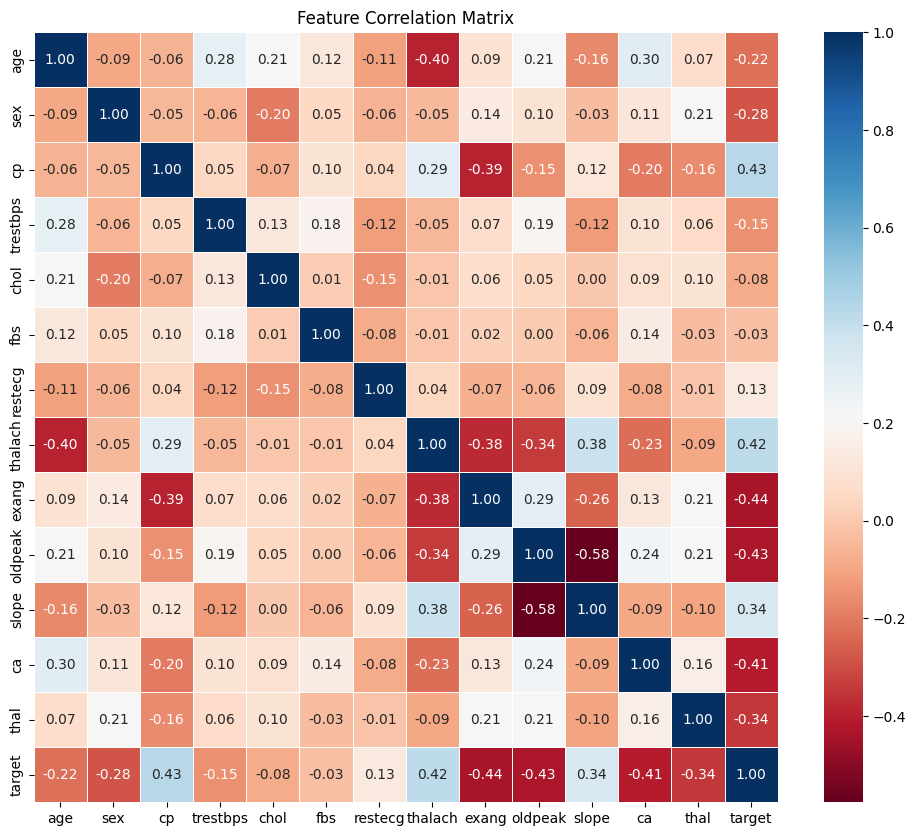

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

Chest Pain Type vs Heart Disease Frequency:


target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


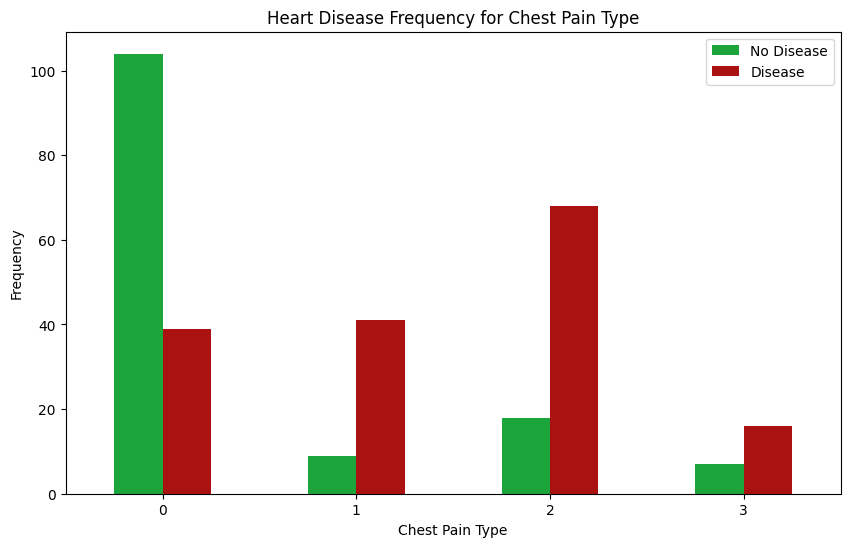

In [11]:
print("Chest Pain Type vs Heart Disease Frequency:")
cp_stat = pd.crosstab(df['cp'], df['target'])
display(cp_stat)

# Visualizing the Crosstab
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

In [12]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']
print(X.head())
print(y.head())
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
Training Shape: (241, 13)
Testing Shape: (61, 13)


In [13]:
import joblib
# Scaling is crucial for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# print(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
# print(X_test_scaled)
print("Data Scaled.")
joblib.dump(scaler,"scaler.pkl")

Data Scaled.


['scaler.pkl']

In [14]:
from xgboost import XGBClassifier

# Define Individual Models
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
# Initialize XGBoost model
clf3 = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
# clf3 = GradientBoostingClassifier(random_state=42)

# Create Voting Classifier (Soft Voting)
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)],
    voting='soft'
)
print("Models Initialized.")

Models Initialized.


In [15]:
# !pip install xgboost

In [16]:
print("Training Voting Classifier...")
eclf.fit(X_train_scaled, y_train)
print("Training Complete.")

Training Voting Classifier...
Training Complete.


In [17]:
y_pred = eclf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {acc*100:.2f}%")

Voting Classifier Accuracy: 81.97%


Classification :
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



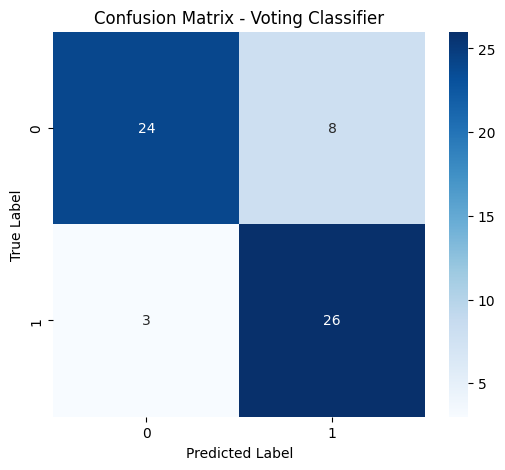

In [18]:
print("Classification :")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Voting Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [19]:
import joblib


In [20]:
# save model
joblib.dump(eclf, "model.pkl")
print("Model saved!")

Model saved!


In [21]:
loaded_model = joblib.load("model.pkl")


In [22]:
loaded_model

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [23]:
# # To check sample prediction

# # Feature names in the correct order (must match columns used to train model)
# features = ["age","sex","cp","trestbps","chol","fbs","restecg",
#             "thalach","exang","oldpeak","slope","ca","thal"]

# print("\nTo predict, enter the 13 feature values in this order (comma-separated):")
# print(features)
# print("Example: 52,1,0,125,212,0,1,168,0,1.0,2,2,3")

# # Read raw input as one line
# raw = input("Enter comma-separated values: ").strip()

# # Robust parsing and validation
# try:
#     vals = [float(x.strip()) for x in raw.split(',') if x.strip() != ""]
# except ValueError:
#     raise SystemExit("Invalid input: all values must be numeric (ints or floats).")

# if len(vals) != len(features):
#     raise SystemExit(f"Invalid input: expected {len(features)} values but got {len(vals)}.")

# X_new = np.array(vals).reshape(1, -1)

# # Load scaler and model
# try:
#     scaler = joblib.load("scaler.pkl")
# except Exception as e:
#     raise SystemExit(f"Could not load scaler.pkl: {e}")

# try:
#     loaded_model = joblib.load("model.pkl")
# except Exception as e:
#     raise SystemExit(f"Could not load model.pkl: {e}")

# # Scale input and predict
# X_new_scaled = scaler.transform(X_new)
# pred = loaded_model.predict(X_new_scaled)[0]

# # If model supports probabilities, show them
# proba = None
# if hasattr(loaded_model, "predict_proba"):
#     try:
#         proba = loaded_model.predict_proba(X_new_scaled)[0]
#         # for binary: proba[1] is probability for class 1 (disease)
#     except Exception:
#         proba = None

# print("\n--- Prediction Result ---")
# print("Input (features):")
# for name, value in zip(features, vals):
#     print(f"  {name}: {value}")

# print(f"\nPredicted class: {pred}")

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load model and scaler
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")

# Feature order
features = ["age","sex","cp","trestbps","chol","fbs","restecg",
            "thalach","exang","oldpeak","slope","ca","thal"]

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json()
        
        if not data or "features" not in data:
            return jsonify({"error": "JSON must contain 'features' field"}), 400

        values = data["features"]

        if len(values) != len(features):
            return jsonify({
                "error": f"Expected {len(features)} values",
                "order_required": features
            }), 400

        # Convert to numpy array
        X = np.array(values).reshape(1, -1)

        # Scale & predict
        X_scaled = scaler.transform(X)
        pred = int(model.predict(X_scaled)[0])

        # Probability (if model supports it)
        prob = None
        if hasattr(model, "predict_proba"):
            prob = float(model.predict_proba(X_scaled)[0][1])

        return jsonify({
            "prediction": pred,
            "probability_of_disease": prob
        })

    except Exception as e:
        return jsonify({"error": str(e)}), 500


@app.route("/")
def home():
    return "Heart Disease Prediction API is running!"


if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [07/Dec/2025 16:30:39] "POST /predict HTTP/1.1" 200 -


In [ ]:
!pip install flask
